### <center> K-means </center>
                                                    

In [59]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
databis = arff.loadarff(open('diamond9.arff','r'))[0]
datatier = arff.loadarff(open('dense-disk-5000.arff','r'))[0]

data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))

#k means
    
def calinski_metric_kmeans(data2):
    scores=[]
    start = time.time()
    print('on applique kmeans avec calinski')


    for j in range(2, 10):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        labels = cl.labels_
        calinski=metrics.calinski_harabasz_score(data2, labels)
        scores.append(calinski)
        plt.scatter(j, calinski )

    end = time.time()
    print(f'execution time calinski kmeans : {end-start}')

    plt.title('calinski metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    
    
def sil_kmeans(data2):
    print('on applique kmeans avec silhouette')
    scores=[]
    start = time.time()

    for j in range(2,10):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        labels = cl.labels_
        sil=metrics.silhouette_score(data2, labels, metric='euclidean')
        scores.append(sil)
        plt.scatter(j, sil )

    end = time.time()
    print(f'execution time silhouette kmeans : {end-start}')

    plt.title('silhouette metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    
def davies_kmeans(data2):
    print('on applique kmeans avec davies')
    scores=[]
    start = time.time()

    for j in range(2, 10):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        labels = cl.labels_
        davies_b=davies_bouldin_score(data2, labels)
        scores.append(davies_b)
        plt.scatter(j, davies_b )

    end = time.time()
    print(f'execution time davies kmeans : {end-start}')

    plt.title('davies metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def kmeans(nbcluster, data2, X=X , Y=Y):
    start = time.time()
    clustering = KMeans(n_clusters=nbcluster, init = 'k-means++').fit_predict(data2)
    plt.scatter(X, Y, c=clustering)
    end = time.time()
    print(f'execution time kmeans = {end - start}')
    sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
    calinski=metrics.calinski_harabasz_score(data2, clustering)
    print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
    plt.title('kmeans clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def kmeans3D(nbcluster, data2, X=X , Y=Y):
    start = time.time()
    clustering = KMeans(n_clusters=nbcluster, init = 'k-means++').fit_predict(data2)
    end = time.time()
    print(f'execution time kmeans = {end - start}')
    sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
    calinski=metrics.calinski_harabasz_score(data2, clustering)
    print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    y = data2[:,0]
    x = data2[:,1]
    z = data2[:,2]
    plt.title('kmeans clustering')
    ax.scatter(x, y, z, c=clustering, cmap='viridis', linewidth=0.5)
    plt.show()

execution time kmeans = 0.2683532238006592
score silhouette metrique : 0.3600414234482207, calinski score : 238.12154095849047


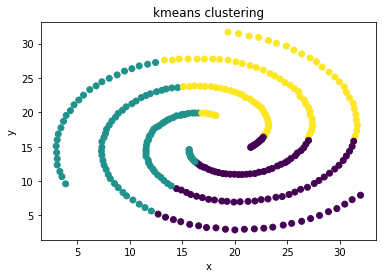

on applique kmeans avec silhouette
execution time silhouette kmeans : 0.2594292163848877


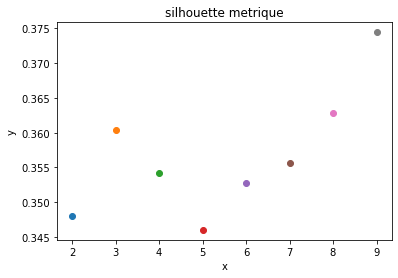

on applique kmeans avec calinski
execution time calinski kmeans : 0.25688886642456055


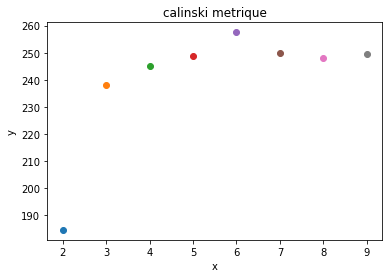

In [2]:
kmeans(3, data2)
#davies_kmeans(data2)
sil_kmeans(data2)
calinski_metric_kmeans(data2)

### <center> Agglomerative Clustering method </center>
                                                    

In [61]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))


def calinski_metric_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec calinski '+i)

        for j in range(2,10):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            calinski=metrics.calinski_harabasz_score(data2, cl)
            scores.append(calinski)
            plt.scatter(j, calinski )

        end = time.time()
        print(f'execution time calinski metric {i} agglomerative : {end-start}')

        plt.title('calinski metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

def sil_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec sil '+i)


        for j in range(2,10):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            sil=metrics.silhouette_score(data2, cl, metric='euclidean')
            scores.append(sil)
            plt.scatter(j, sil )

        end = time.time()
        print(f'execution time silhouette metric {i} agglomerative : {end-start}')

        plt.title('silhouette metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    

def davies_agglo(data2):
    scores=[]
    start = time.time()

    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec davies '+i)

        for j in range(2,10):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            davies_b=davies_bouldin_score(data2, cl)
            scores.append(davies_b)
            plt.scatter(j, davies_b )

        end = time.time()
        print(f'execution time davies metric {i} agglomerative : {end-start}')

        plt.title('davies metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    
def agglo(data2, nbcluster, X=X, Y=Y):
    for j in ['single', 'average', 'complete', 'ward']:
        start=time.time()
        
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters
        # linkage pour définir quels points on prend dans le cluster 
        # affinity pour indiquer quel metrique on utilise
        clustering = AgglomerativeClustering(n_clusters=nbcluster, linkage=j, affinity='euclidean').fit_predict(data2)
        plt.scatter(X, Y, c=clustering)
        end = time.time()
        plt.title('agglomerative method '+ j)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
        
        sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
        calinski=metrics.calinski_harabasz_score(data2, clustering)
        print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
        print(f'execution time agglomerative : {end - start}')
        
def agglo3D(data2, nbcluster, X=X, Y=Y):
    for j in ['single', 'average', 'complete', 'ward']:
        start=time.time()
        clustering = AgglomerativeClustering(n_clusters=nbcluster, linkage=j, affinity='euclidean').fit_predict(data2)
        end = time.time()
        sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
        calinski=metrics.calinski_harabasz_score(data2, clustering)
        print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
        print(f'execution time agglomerative : {end - start}')
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        y = data2[:,0]
        x = data2[:,1]
        z = data2[:,2]
        ax.scatter(x, y, z, c=clustering, cmap='viridis', linewidth=0.5)
        plt.title('agglomerative method '+ j)
        plt.show()


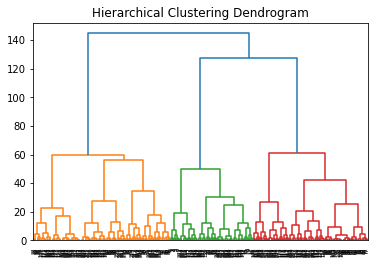

In [4]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data2)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level")
plt.show()

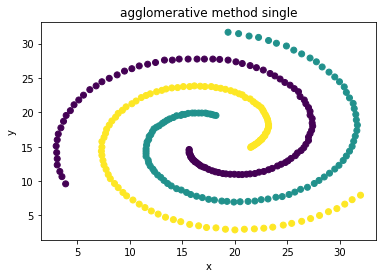

score silhouette metrique : 0.0013442973442779936, calinski score : 5.797852185441633
execution time agglomerative : 0.017727375030517578


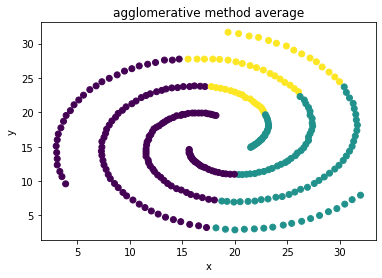

score silhouette metrique : 0.31852406062753236, calinski score : 187.02361024607876
execution time agglomerative : 0.016430377960205078


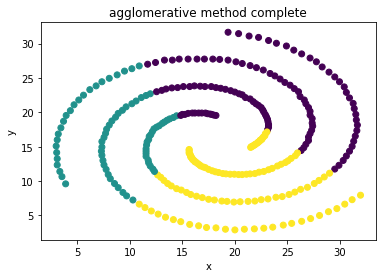

score silhouette metrique : 0.34553575996045643, calinski score : 216.64159484961786
execution time agglomerative : 0.016376495361328125


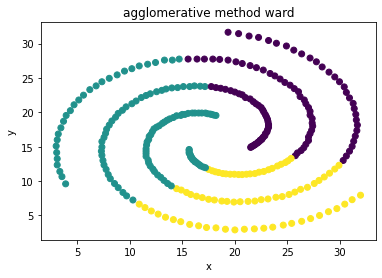

score silhouette metrique : 0.35931967520170405, calinski score : 228.11936417045422
execution time agglomerative : 0.013886451721191406


In [5]:
agglo(data2,3)
#calinski_metric_agglo(data2)
#sil_agglo(data2)
#davies_agglo(data2)

### <center> DBSCAN </center>
                                                    

In [99]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN
import sys

data = arff.loadarff(open('banana.arff','r'))[0]
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))
    
#plt.show()

def davies_dbscan(data2):
    scores=[]    
    maxi=0

    for my_min_samp in range(2, 5):
        for my_eps in np.arange(0.2, 0.4, 0.05):
            start=time.time()
            cl = DBSCAN(min_samples=my_min_samp, eps=my_eps).fit_predict(data2)
            davies_b=davies_bouldin_score(data2, cl)
            end = time.time()
            #print(end - start)
            if davies_b > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=davies_b
            
    print(f'Best tuple min_sample, epsilon : {best_tuple} with a davies score : {maxi}')
    
def sil_dbscan(data2):
    scores=[]    
    maxi=0
    
    for my_min_samp in range(2, 5):
         for my_eps in np.arange(0.2, 0.4, 0.05):
            start=time.time()
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit_predict(data2)
            sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
            end = time.time()
            #print(end - start)
            if sil > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=sil
                
                
    print(f'Best tuple min_sample, my_epsilon : {best_tuple}, avec un score silhouette de {maxi}') 
    
def calinski_metric_dbscan(data2):
    scores=[]    
    maxi=0
    
    for my_min_samp in range(2, 5):
         for my_eps in np.arange(0.2, 0.4, 0.05):
            start=time.time()
            clustering = DBSCAN(min_samples=my_min_samp,eps=my_eps ).fit(data2)
            calinski=metrics.calinski_harabasz_score(data2, clustering.labels_)
            end = time.time()
            #print(end - start)
            if calinski > maxi :
                best_tuple= (my_min_samp, my_eps)
                maxi=calinski
                
    print(f'Best tuple min_sample, my_epsilon : {best_tuple}, avec un score calinski de {maxi}') 
    
def method_DBSCAN (data2, my_min_samp, my_eps, X=X, Y=Y):
    start=time.time()
    clustering = DBSCAN(min_samples=my_min_samp, eps=my_eps).fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=clustering)
    
    plt.title('dbscan clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
    calinski=metrics.calinski_harabasz_score(data2, clustering)
    print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
    print(f'execution time dbscan : {end - start}')
    
    
def method_DBSCAN3D (data2, my_min_samp, my_eps, X=X, Y=Y):
    start=time.time()
    clustering = DBSCAN(min_samples=my_min_samp, eps=my_eps).fit_predict(data2)
    end = time.time()    
    sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
    calinski=metrics.calinski_harabasz_score(data2, clustering)
    print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
    print(f'execution time dbscan : {end - start}')
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    y = data2[:,0]
    x = data2[:,1]
    z = data2[:,2]
    ax.scatter(x, y, z, c=clustering, cmap='viridis', linewidth=0.5)
    plt.title('dbscan clustering')
    plt.show()


        

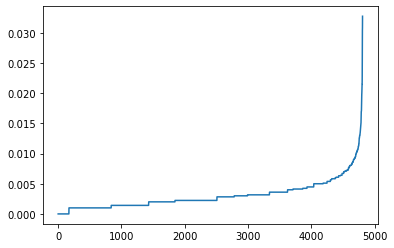

In [7]:
#Methode du coude
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

def elbow (data):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    
elbow(data2)

on applique dbscan, eps : 0.005 et min_samples :5


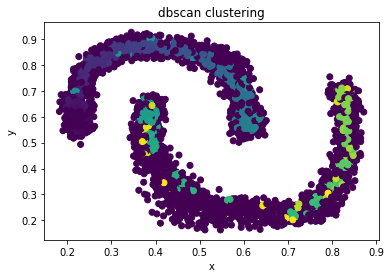

score silhouette metrique : -0.34536990394434336, calinski score : 25.497989526633088
execution time dbscan : 0.014158010482788086
on applique dbscan, eps : 0.007 et min_samples :5


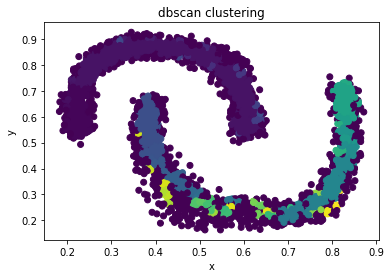

score silhouette metrique : -0.4373274088633496, calinski score : 122.22563636199551
execution time dbscan : 0.013776063919067383
on applique dbscan, eps : 0.009000000000000001 et min_samples :5


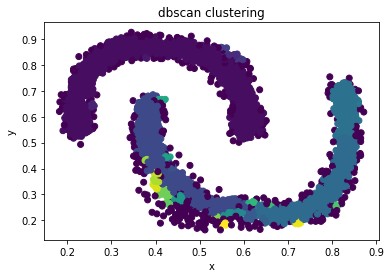

score silhouette metrique : -0.5131273789508995, calinski score : 265.08118033625044
execution time dbscan : 0.014694690704345703
on applique dbscan, eps : 0.011 et min_samples :5


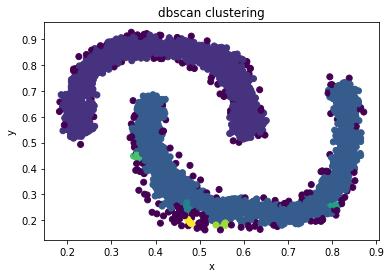

score silhouette metrique : -0.1276553491658707, calinski score : 507.5849283259425
execution time dbscan : 0.015654325485229492
on applique dbscan, eps : 0.013000000000000001 et min_samples :5


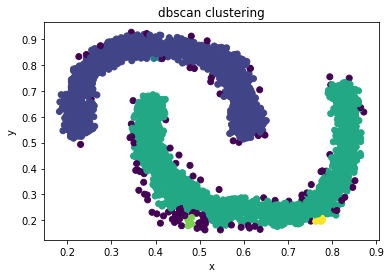

score silhouette metrique : -0.2990732065500347, calinski score : 744.2460714369896
execution time dbscan : 0.016315460205078125
on applique dbscan, eps : 0.015 et min_samples :5


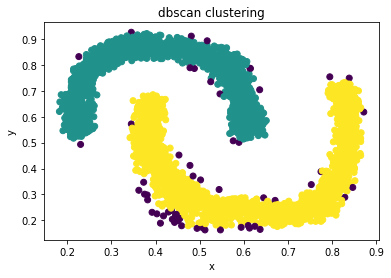

score silhouette metrique : 0.24727911813810494, calinski score : 1856.1481433859826
execution time dbscan : 0.01732659339904785
on applique dbscan, eps : 0.017 et min_samples :5


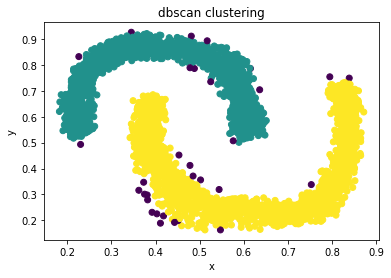

score silhouette metrique : 0.24897569482160103, calinski score : 1861.1707902824262
execution time dbscan : 0.017898082733154297
on applique dbscan, eps : 0.019 et min_samples :5


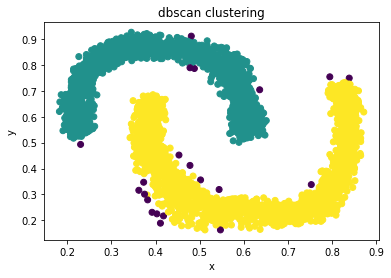

score silhouette metrique : 0.2422843175058862, calinski score : 1870.5978443249867
execution time dbscan : 0.019221782684326172
on applique dbscan, eps : 0.021 et min_samples :5


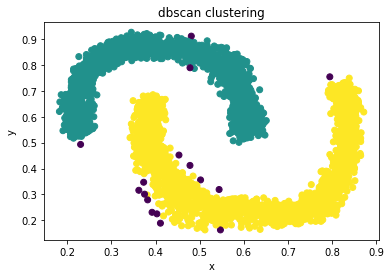

score silhouette metrique : 0.22442773928321086, calinski score : 1875.8130464695714
execution time dbscan : 0.01981806755065918
on applique dbscan, eps : 0.023000000000000003 et min_samples :5


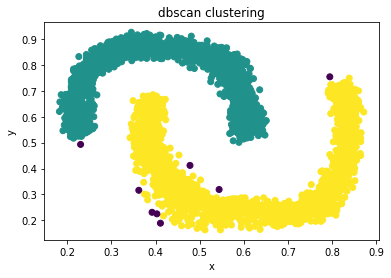

score silhouette metrique : 0.22342941949130415, calinski score : 1878.8534965275473
execution time dbscan : 0.020636796951293945
on applique dbscan, eps : 0.025 et min_samples :5


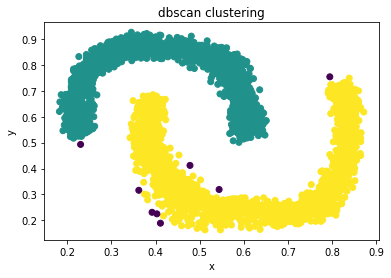

score silhouette metrique : 0.22342941949130415, calinski score : 1878.8534965275473
execution time dbscan : 0.021123647689819336
on applique dbscan, eps : 0.027 et min_samples :5


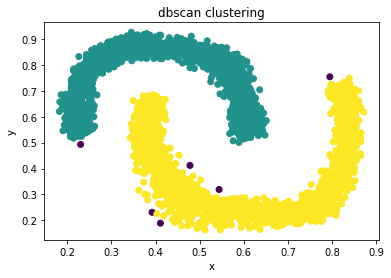

score silhouette metrique : 0.23372838125620218, calinski score : 1876.6229184597144
execution time dbscan : 0.022297382354736328
on applique dbscan, eps : 0.029 et min_samples :5


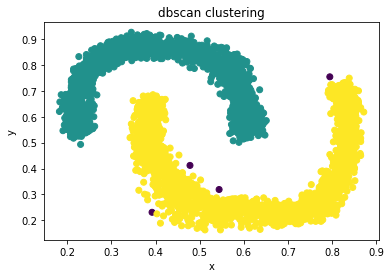

score silhouette metrique : 0.21874957715055052, calinski score : 1875.822477357022
execution time dbscan : 0.023083209991455078
on applique dbscan, eps : 0.031000000000000003 et min_samples :5


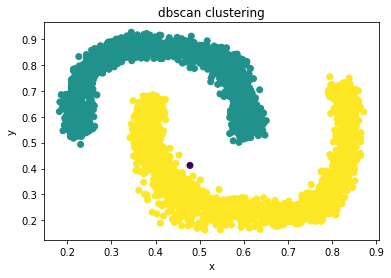

score silhouette metrique : 0.07391946979564398, calinski score : 1875.8518482520692
execution time dbscan : 0.02386784553527832
on applique dbscan, eps : 0.033 et min_samples :5


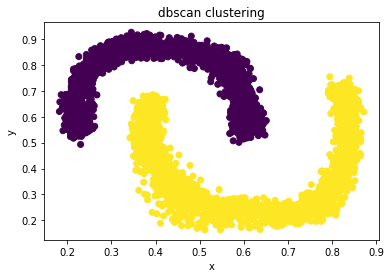

score silhouette metrique : 0.36733109590793084, calinski score : 3751.7304672665023
execution time dbscan : 0.02695298194885254
on applique dbscan, eps : 0.034999999999999996 et min_samples :5


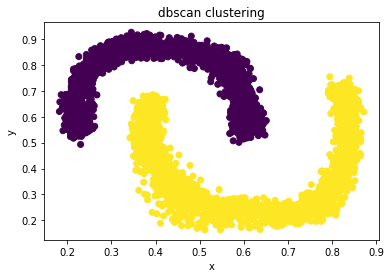

score silhouette metrique : 0.36733109590793084, calinski score : 3751.7304672665023
execution time dbscan : 0.025876760482788086
on applique dbscan, eps : 0.037 et min_samples :5


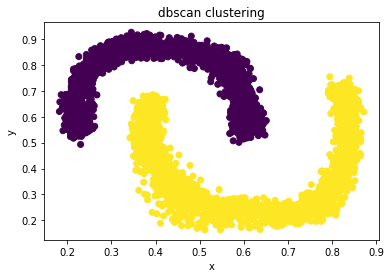

score silhouette metrique : 0.36733109590793084, calinski score : 3751.7304672665023
execution time dbscan : 0.02727508544921875
on applique dbscan, eps : 0.039 et min_samples :5


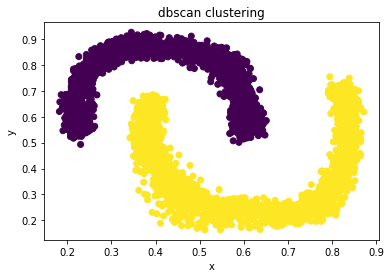

score silhouette metrique : 0.36733109590793084, calinski score : 3751.7304672665023
execution time dbscan : 0.027972698211669922
on applique dbscan, eps : 0.041 et min_samples :5


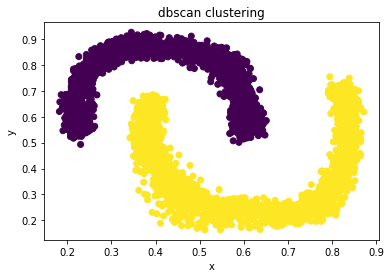

score silhouette metrique : 0.36733109590793084, calinski score : 3751.7304672665023
execution time dbscan : 0.02800440788269043
on applique dbscan, eps : 0.043 et min_samples :5


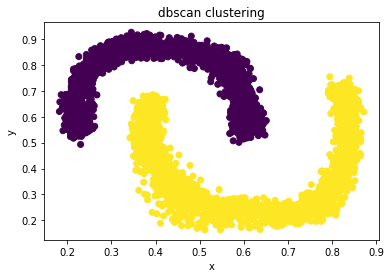

score silhouette metrique : 0.36733109590793084, calinski score : 3751.7304672665023
execution time dbscan : 0.028144121170043945


In [8]:
for i in np.arange(0.005, 0.045, 0.002):
    print(f'on applique dbscan, eps : {i} et min_samples :5')
    method_DBSCAN(data2, 5, i)

### <center> HDBSCAN </center>
                                                    

In [62]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.datasets import make_blobs
import sys

data = arff.loadarff(open('diamond9.arff','r'))[0]

data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))


def davies_hdbscan(data2):
    scores=[] 
    maxi=0

    for my_min_samp in range(2, 5):
        start=time.time()
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        davies_b=davies_bouldin_score(data2, labels)
        end = time.time()
        #print(end - start)
        if davies_b > maxi :
            best= my_min_samp
            maxi=davies_b
            
    print(f'Best minsamples : {best}, avec un score davies de {maxi}') 
    
def sil_hdbscan(data2):
    scores=[] 
    maxi=0

    for my_min_samp in range(2, 5):
        start=time.time()
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        sil=metrics.silhouette_score(data2, cluster_labels, metric='euclidean')
        end = time.time()
        #print(end - start)
        if sil > maxi :
            best= my_min_samp
            maxi=sil
            
    print(f'Best minsamples : {best}, avec un score silhouette de {maxi}') 
    
    
def calinski_metric_hdbscan(data2):
    scores=[] 
    maxi=0

    for my_min_samp in range(2, 5):
        start=time.time()
        clustering2 = hdbscan.HDBSCAN(min_samples=my_min_samp)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        calinski=metrics.calinski_harabasz_score(data2, cluster_labels)
        end = time.time()
        #print(end - start)
        if calinski > maxi :
            best= my_min_samp
            maxi=calinski

    print(f'Best minsamples : {best}, avec un score calinski de {maxi}') 
    
    
def HDBSCAN (data2, my_min_samp, X=X, Y=Y):
    start=time.time()
    clustering = hdbscan.HDBSCAN(min_samples=my_min_samp)
    cluster_labels = clustering.fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=cluster_labels)

    plt.title('hdbscan clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    sil=metrics.silhouette_score(data2, cluster_labels, metric='euclidean')
    calinski=metrics.calinski_harabasz_score(data2, cluster_labels)
    print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
    print(f'execution time hdbscan : {end - start}')


def HDBSCAN3D (data2, my_min_samp, X=X, Y=Y):
    start=time.time()
    clustering = hdbscan.HDBSCAN(min_samples=my_min_samp)
    cluster_labels = clustering.fit_predict(data2)
    end = time.time()
    sil=metrics.silhouette_score(data2, cluster_labels, metric='euclidean')
    calinski=metrics.calinski_harabasz_score(data2, cluster_labels)
    print(f'score silhouette metrique : {sil}, calinski score : {calinski}')
    print(f'execution time hdbscan : {end - start}')
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    y = data2[:,0]
    x = data2[:,1]
    z = data2[:,2]
    ax.scatter(x, y, z, c=cluster_labels, cmap='viridis', linewidth=0.5)
    plt.title('hdbscan clustering')
    plt.show()





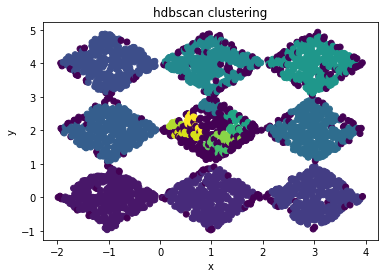

score silhouette metrique : 0.3326393480310736, calinski score : 1102.1003474084725
execution time hdbscan : 0.04434680938720703


In [10]:
HDBSCAN(data2, 9)

### <center> Synthèse </center>
                                                    

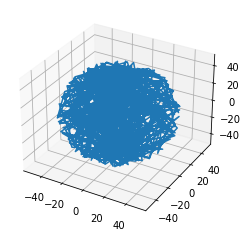

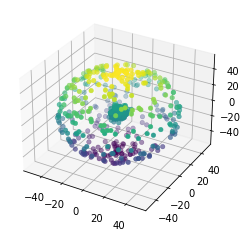

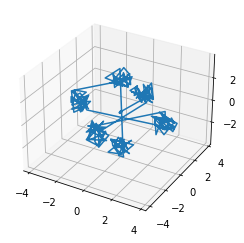

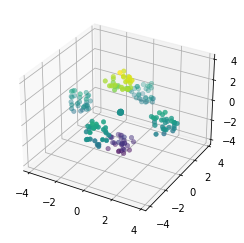

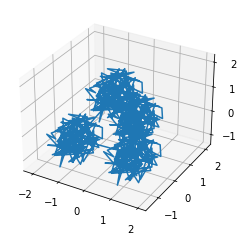

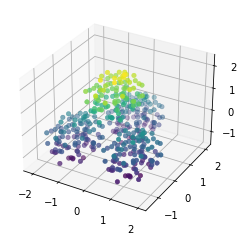

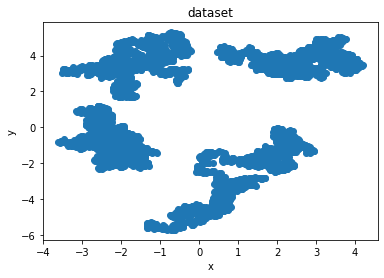

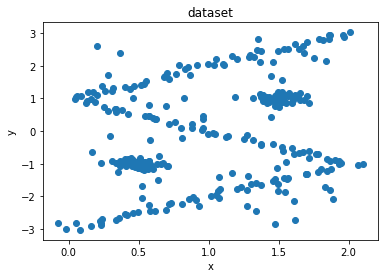

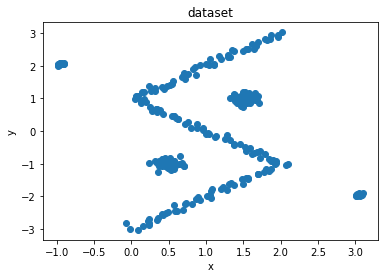

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [11]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.genfromtxt('dataset/a.txt')
data2 = np.genfromtxt('dataset/h.txt')
data3 = np.genfromtxt('dataset/t.txt')
data4 = np.genfromtxt('dataset/tr.txt')
data5 = np.genfromtxt('dataset/zgn.txt')
data6 = np.genfromtxt('dataset/zgo.txt')

for j in [data, data2, data3] : 
    fig1 = plt.figure()
    fig2 = plt.figure()
    ax1 = fig1.gca(projection='3d')
    ax2 = fig2.gca(projection='3d')
    y = j[:,0]
    x = j[:,1]
    z = j[:,2]
    ax1.plot(x, y, z)
    ax2.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
    plt.show()
    
for j in [data4, data5, data6] : 
    y = j[:,0]
    x = j[:,1]
    plt.scatter(x, y)
    plt.title('dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    """
    données 3D
    
    data : sphere avec noyau, nb cluster attendus : 2
    data2 : 6 paquets distincts et plus particulièrement 2 groupes de trois paquets 
            ainsi qu'un point central, nb cluster attendus : 6 (+1?)
    data3 : 4 paquets moyens plus rapprochés, nb cluster attendus : 4
    
    données 2D
    
    data4 : 4 paquets assez étalés, nb cluster attendus : 4 (+1 si on considère qu'un paquet très étalé est en fait composé de deux paquets)
    data5 : un Z, deux paquets, et des points "aléatoires", nb cluster attendus : 3 et une autre couleur pour les points "aléatoires"
    data6 : un Z et quatre paquets distincts, nb cluster attendus : 5
    """

for j in [data, data2, data3, data4, data5, data6] : 
    
    
    #davies_kmeans(j)
    #sil_kmeans(j)
    #calinski_metric_kmeans(j)
    #kmeans(nbcluster=, data_ready)
    
    #davies_agglo(j)
    #sil_agglo(j)
    #calinski_metric_agglo(j)
    #agglo(data2, nbcluster=)
    
    davies_dbscan(j)
    sil_dbscan(j)
    calinski_metric_dbscan(j)
    
    #davies_hdbscan(j)
    #sil_hdbscan(j)
    #calinski_metric_hdbscan(j)
    

### Jeux de données en 2D

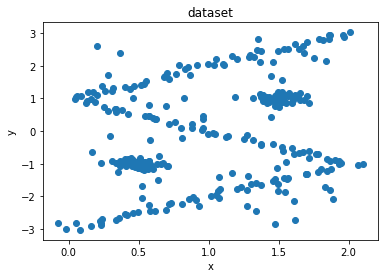

Méthode kmeans :
Méthode Agglomerative :
Méthode DBSCAN :
Méthode HDBSCAN :
Best minsamples : 2, avec un score calinski de 19.999260258619074
Best minsamples : 2, avec un score silhouette de 0.051793742741304716
Best minsamples : 3, avec un score davies de 30.04949115700763


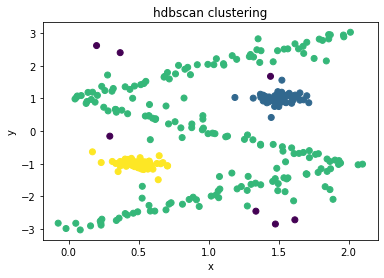

score silhouette metrique : 0.051793742741304716, calinski score : 19.999260258619074
execution time hdbscan : 0.0040929317474365234


In [72]:
data4 = np.genfromtxt('dataset/tr.txt')
data5 = np.genfromtxt('dataset/zgn.txt')
data6 = np.genfromtxt('dataset/zgo.txt')

j=data4
y = j[:,0]
x = j[:,1]
plt.scatter(x, y)
plt.title('dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Méthode kmeans :")
#davies_kmeans(j)
#calinski_metric_kmeans(j)
#sil_kmeans(j)
#kmeans(4, j, x, y)
#kmeans(6, j, x, y)

print("Méthode Agglomerative :")
#calinski_metric_agglo(j)
#sil_agglo(j)
#davies_agglo(j)
#agglo(j, 4, x, y)
#agglo(j, 4, x, y)

print("Méthode DBSCAN :")
#davies_dbscan(j)
#sil_dbscan(j)
#calinski_metric_dbscan(j)
#method_DBSCAN(j, 4, 0.05, x ,y)
#method_DBSCAN(j, 3, 0.15, x ,y)

#for i in np.arange(0.10, 0.2, 0.002):
    #print(f'on applique dbscan, eps : {i} et min_samples :5')
    #method_DBSCAN(j, 5, i, x ,y)
    
print("Méthode HDBSCAN :")
calinski_metric_hdbscan(j)
sil_hdbscan(j)
davies_hdbscan(j)

HDBSCAN(j, 2 ,x, y)

#HDBSCAN(j, 4 ,x, y)

### Jeux de données en 3D

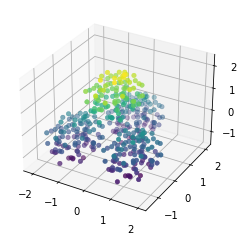

Méthode kmeans :
execution time kmeans = 0.014631509780883789
score silhouette metrique : 0.5057889289788572, calinski score : 418.39120908961354


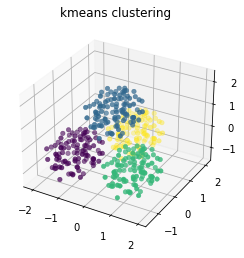

Méthode Agglomerative :
score silhouette metrique : -0.2584524068230835, calinski score : 1.4715622883370751
execution time agglomerative : 0.0021696090698242188


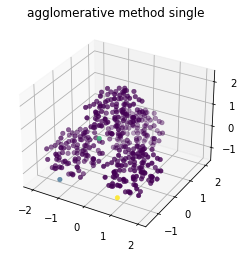

score silhouette metrique : 0.5046643743963499, calinski score : 416.8472632839628
execution time agglomerative : 0.001973390579223633


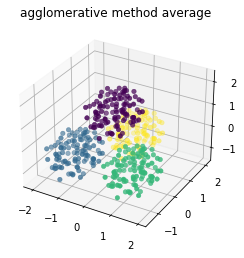

score silhouette metrique : 0.5010021884877641, calinski score : 409.22077590657847
execution time agglomerative : 0.0024352073669433594


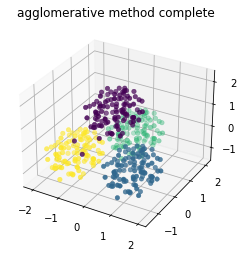

score silhouette metrique : 0.4952113887827159, calinski score : 402.5688669125228
execution time agglomerative : 0.0021266937255859375


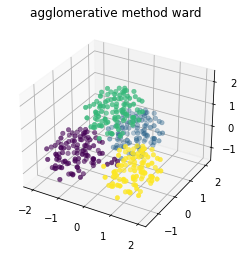

Méthode DBSCAN :
score silhouette metrique : 0.10587845542197057, calinski score : 26.33593283451591
execution time dbscan : 0.0014271736145019531


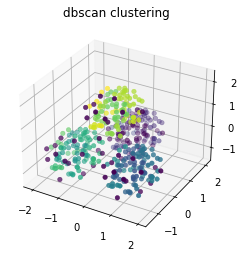

Méthode HDBSCAN :
score silhouette metrique : 0.46931762879594685, calinski score : 296.67662911712864
execution time hdbscan : 0.007272243499755859


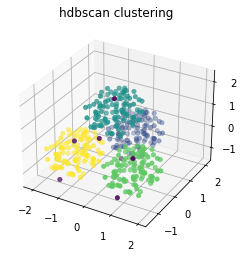

In [110]:
data = np.genfromtxt('dataset/a.txt')
data2 = np.genfromtxt('dataset/h.txt')
data3 = np.genfromtxt('dataset/t.txt')

j=data3
fig = plt.figure()
ax = fig.gca(projection='3d')
y = j[:,0]
x = j[:,1]
z = j[:,2]
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
plt.show()

print("Méthode kmeans :")
#davies_kmeans(j)
#calinski_metric_kmeans(j)
#sil_kmeans(j)
kmeans3D(4, j, x, y)

print("Méthode Agglomerative :")
#calinski_metric_agglo(j)
#sil_agglo(j)
#davies_agglo(j)
agglo3D(j, 4, x, y)

print("Méthode DBSCAN :")
#elbow(j)
#davies_dbscan(j)
#sil_dbscan(j)
#calinski_metric_dbscan(j)
method_DBSCAN3D(j, 2, 0.3, x ,y)

    
print("Méthode HDBSCAN :")
#calinski_metric_hdbscan(j)
#sil_hdbscan(j)
#davies_hdbscan(j)
HDBSCAN3D(j, 2 ,x, y)
